# A Data Visualization Study on "National Family Health Survey"

- *Dataset Name: All India and State/UT-wise Factsheets of National Family Health Survey (NFHS) - 5, 2019-2021*
- *The Dataset used in this analysis has been fetched from https://data.gov.in/catalog/national-family-health-survey-nfhs-5*
- *The Data was published on 15/02/2022 & Updated On 25/02/2022*
- *The Data used for this analysis is a shorter version of the original dataset.*

In [14]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Fetching the data from csv to Dataframe
data=pd.read_csv("indiadata.csv")

## DATA DICTIONARY


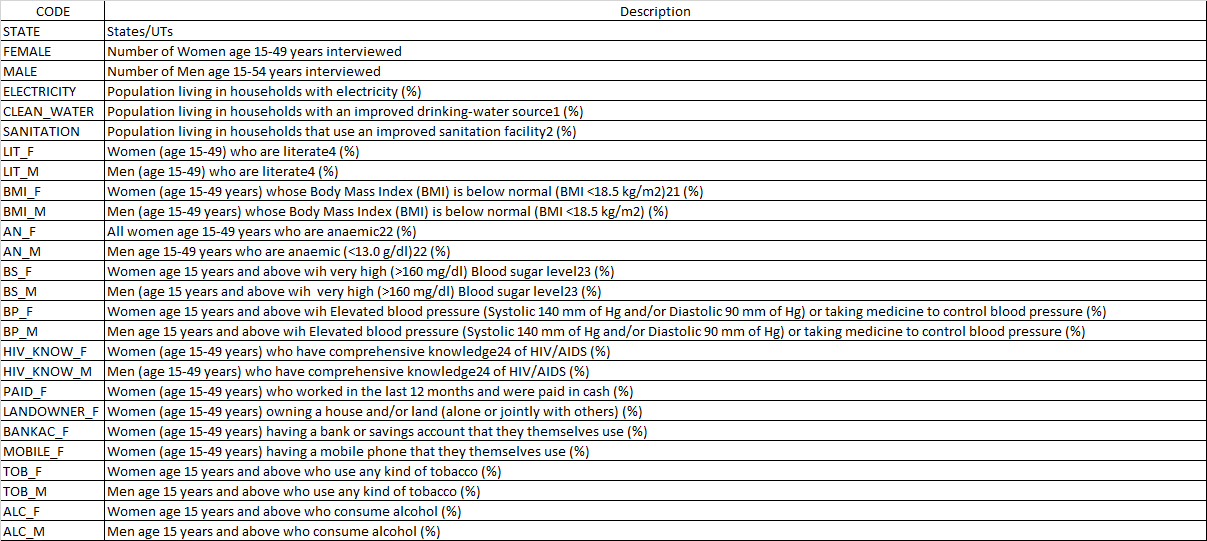

In [3]:
data.head()

,STATE,FEMALE,MALE,ELECTRICITY,CLEAN_WATER,SANITATION,LIT_F,LIT_M,BMI_F,BMI_M,...,HIV_KNOW_F,HIV_KNOW_M,PAID_F,LANDOWNER_F,BANKAC_F,MOBILE_F,TOB_F,TOB_M,ALC_F,ALC_M
0,Andaman,2397,367,97.6,96.3,88.0,86.0,92.5,9.4,4.0,...,14.9,34.7,24.6,15.8,89.2,80.8,31.3,58.7,5.0,39.1
1,Andhra Pradesh,10975,1558,99.5,96.7,77.3,68.6,79.5,14.8,16.5,...,24.6,38.6,42.1,47.8,81.8,48.9,3.8,22.6,0.5,23.3
2,Arunachal Pradesh,19765,2881,94.8,93.7,82.9,73.8,86.7,5.7,4.9,...,12.3,33.4,23.5,70.2,78.2,76.4,18.8,50.3,24.2,52.7
3,Assam,34979,4973,92.6,86.0,68.6,77.2,84.3,17.6,13.4,...,19.2,25.3,19.0,42.7,78.5,57.2,22.1,51.8,7.3,25.1
4,Bihar,42483,4897,96.3,99.2,49.4,57.8,78.5,25.6,21.5,...,10.3,25.2,12.6,55.3,76.7,51.4,5.0,48.8,0.4,15.5


### Points to be Noted:

- Abbreviations used For some States/UTs: 
   <br>||   Andaman :- Andaman and Nicober Islands   ||   DNH, D&D :- Dadra and Nagar Haveli & Daman and Diu    ||</br>
- "States" has been used throughout to refer to both States and Union Teritorries in this notebook.

In [4]:
#Let's check for null data in the dataset
data.isnull().sum()

STATE          0
FEMALE         0
MALE           0
ELECTRICITY    0
CLEAN_WATER    0
SANITATION     0
LIT_F          0
LIT_M          0
BMI_F          0
BMI_M          0
AN_F           0
AN_M           0
BS_F           0
BS_M           0
BP_F           0
BP_M           0
HIV_KNOW_F     0
HIV_KNOW_M     0
PAID_F         0
LANDOWNER_F    0
BANKAC_F       0
MOBILE_F       0
TOB_F          0
TOB_M          0
ALC_F          0
ALC_M          0
dtype: int64

In [5]:
#Let's check the data types and information contained in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STATE        35 non-null     object 
 1   FEMALE       35 non-null     int64  
 2   MALE         35 non-null     int64  
 3   ELECTRICITY  35 non-null     float64
 4   CLEAN_WATER  35 non-null     float64
 5   SANITATION   35 non-null     float64
 6   LIT_F        35 non-null     float64
 7   LIT_M        35 non-null     float64
 8   BMI_F        35 non-null     float64
 9   BMI_M        35 non-null     float64
 10  AN_F         35 non-null     float64
 11  AN_M         35 non-null     float64
 12  BS_F         35 non-null     float64
 13  BS_M         35 non-null     float64
 14  BP_F         35 non-null     float64
 15  BP_M         35 non-null     float64
 16  HIV_KNOW_F   35 non-null     float64
 17  HIV_KNOW_M   35 non-null     float64
 18  PAID_F       35 non-null     float64
 19  LANDOWNER_

In [6]:
#Let's check the statistical variations in the data.
data.describe()

,FEMALE,MALE,ELECTRICITY,CLEAN_WATER,SANITATION,LIT_F,LIT_M,BMI_F,BMI_M,AN_F,...,HIV_KNOW_F,HIV_KNOW_M,PAID_F,LANDOWNER_F,BANKAC_F,MOBILE_F,TOB_F,TOB_M,ALC_F,ALC_M
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,20077.342857,2823.371429,98.060000,93.920000,76.568571,80.271429,90.537143,14.571429,12.354286,53.497143,...,26.031429,36.182857,27.377143,42.854286,79.771429,65.522857,12.917143,37.828571,2.960000,24.974286
std,18536.256439,2516.552463,2.375141,5.520859,12.699300,9.795845,5.057149,6.531803,5.298465,13.434667,...,11.888397,12.661649,9.105560,17.219506,7.020666,15.186489,14.668243,15.133224,4.966251,11.206966
min,746.000000,104.000000,91.000000,77.100000,42.300000,57.800000,78.500000,4.400000,2.100000,25.800000,...,10.300000,15.900000,10.900000,15.800000,63.700000,38.500000,0.400000,12.100000,0.200000,0.400000
25%,7296.500000,1047.500000,97.700000,91.500000,69.950000,74.200000,86.900000,9.700000,8.500000,45.200000,...,18.950000,27.350000,20.900000,26.750000,75.050000,50.900000,3.050000,26.700000,0.300000,16.800000
50%,13280.000000,1824.000000,99.100000,95.500000,76.800000,81.400000,92.300000,13.900000,12.500000,54.700000,...,24.300000,33.600000,25.700000,42.700000,79.600000,61.800000,8.400000,38.600000,0.900000,24.000000
75%,28219.500000,4019.500000,99.600000,98.550000,85.000000,86.800000,93.600000,19.300000,16.200000,61.650000,...,29.850000,40.450000,33.700000,56.550000,84.650000,80.150000,17.400000,48.600000,4.650000,32.750000
max,93124.000000,12043.000000,100.000000,99.900000,99.800000,98.300000,99.100000,26.200000,21.500000,92.800000,...,64.100000,67.200000,45.100000,72.200000,92.600000,91.200000,61.600000,72.900000,24.200000,52.700000


*Let's define a new metric called "BASIC_NEEDS" that gives a combined score based on percentage access to Sanitation, Clean Water and Electricity (all having equal weightage).*


In [17]:
# Creating a new derived metric for analysis.
data["BASIC_NEEDS"]=round((data["ELECTRICITY"]+data["CLEAN_WATER"]+data["SANITATION"])/3,1)

In [18]:
data.head()

,STATE,FEMALE,MALE,ELECTRICITY,CLEAN_WATER,SANITATION,LIT_F,LIT_M,BMI_F,BMI_M,...,HIV_KNOW_M,PAID_F,LANDOWNER_F,BANKAC_F,MOBILE_F,TOB_F,TOB_M,ALC_F,ALC_M,BASIC_NEEDS
0,Andaman,2397,367,97.6,96.3,88.0,86.0,92.5,9.4,4.0,...,34.7,24.6,15.8,89.2,80.8,31.3,58.7,5.0,39.1,94.0
1,Andhra Pradesh,10975,1558,99.5,96.7,77.3,68.6,79.5,14.8,16.5,...,38.6,42.1,47.8,81.8,48.9,3.8,22.6,0.5,23.3,91.2
2,Arunachal Pradesh,19765,2881,94.8,93.7,82.9,73.8,86.7,5.7,4.9,...,33.4,23.5,70.2,78.2,76.4,18.8,50.3,24.2,52.7,90.5
3,Assam,34979,4973,92.6,86.0,68.6,77.2,84.3,17.6,13.4,...,25.3,19.0,42.7,78.5,57.2,22.1,51.8,7.3,25.1,82.4
4,Bihar,42483,4897,96.3,99.2,49.4,57.8,78.5,25.6,21.5,...,25.2,12.6,55.3,76.7,51.4,5.0,48.8,0.4,15.5,81.6


## Who fared better in providing the Basic Amenities to its Population!

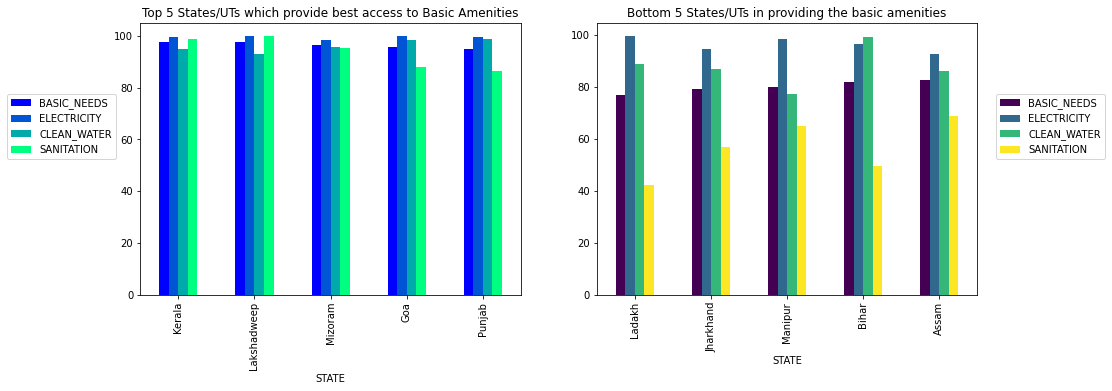

In [19]:
# Grading the best 5 and worst 5 states.
fig, ax =plt.subplots(1,2, figsize=(15, 5))
best_basic_needs=data.nlargest(5,"BASIC_NEEDS")[["STATE","BASIC_NEEDS","ELECTRICITY","CLEAN_WATER","SANITATION"]]
best_basic_needs.plot(x="STATE",y=["BASIC_NEEDS","ELECTRICITY","CLEAN_WATER","SANITATION"], kind="bar", cmap = "winter", ax=ax[0])
worst_basic_needs=data.nsmallest(5,"BASIC_NEEDS")[["STATE","BASIC_NEEDS","ELECTRICITY","CLEAN_WATER","SANITATION"]]
worst_basic_needs.plot(x="STATE",y=["BASIC_NEEDS","ELECTRICITY","CLEAN_WATER","SANITATION"], kind="bar", cmap = 'viridis', ax=ax[1])
ax[0].set_title("Top 5 States/UTs which provide best access to Basic Amenities")
ax[1].set_title("Bottom 5 States/UTs in providing the basic amenities")

ax[0].legend(loc=(-0.35,0.5))
ax[1].legend(loc=(1.05,0.5))

## Analysis of Common Diseases and Illnesses across the country.

*Firstly Let us visualise the Gender Wise distribution of Common diseases across the country*

Text(0.5, 1.0, 'Men & Women (age 15 years and above) wih\n very high (>160 mg/dl) Blood sugar level (%)')

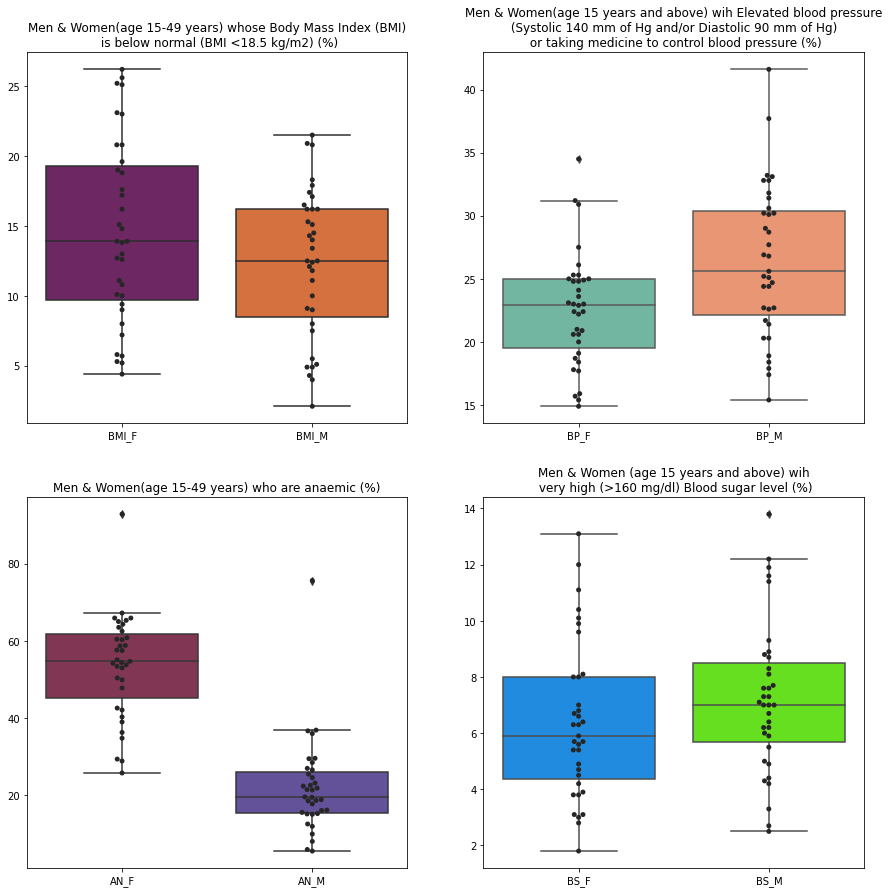

In [10]:
fig, ax =plt.subplots(2,2, figsize=(15, 15))
sns.boxplot(data=data[["BMI_F","BMI_M"]], palette='inferno', ax=ax[0][0])
sns.swarmplot(data=data[["BMI_F","BMI_M"]], color=".15", ax=ax[0][0])
sns.boxplot(data=data[["BS_F","BS_M"]], palette='gist_rainbow_r', ax=ax[1][1])
sns.swarmplot(data=data[["BS_F","BS_M"]], color=".15", ax=ax[1][1])
sns.boxplot(data=data[["BP_F","BP_M"]], palette='Set2', ax=ax[0][1])
sns.swarmplot(data=data[["BP_F","BP_M"]], color=".15", ax=ax[0][1])
sns.boxplot(data=data[["AN_F","AN_M"]], palette='twilight_r', ax=ax[1][0])
sns.swarmplot(data=data[["AN_F","AN_M"]], color=".15", ax=ax[1][0])
ax[0, 0].set_title("Men & Women(age 15-49 years) whose Body Mass Index (BMI)\n is below normal (BMI <18.5 kg/m2) (%)")
ax[0, 1].set_title("Men & Women(age 15 years and above) wih Elevated blood pressure\n (Systolic 140 mm of Hg and/or Diastolic 90 mm of Hg) \n or taking medicine to control blood pressure (%)")
ax[1, 0].set_title("Men & Women(age 15-49 years) who are anaemic (%)")
ax[1, 1].set_title("Men & Women (age 15 years and above) wih\n very high (>160 mg/dl) Blood sugar level (%)")


*Investigating the States, in which the population is most likely to suffer from the given diseases.*

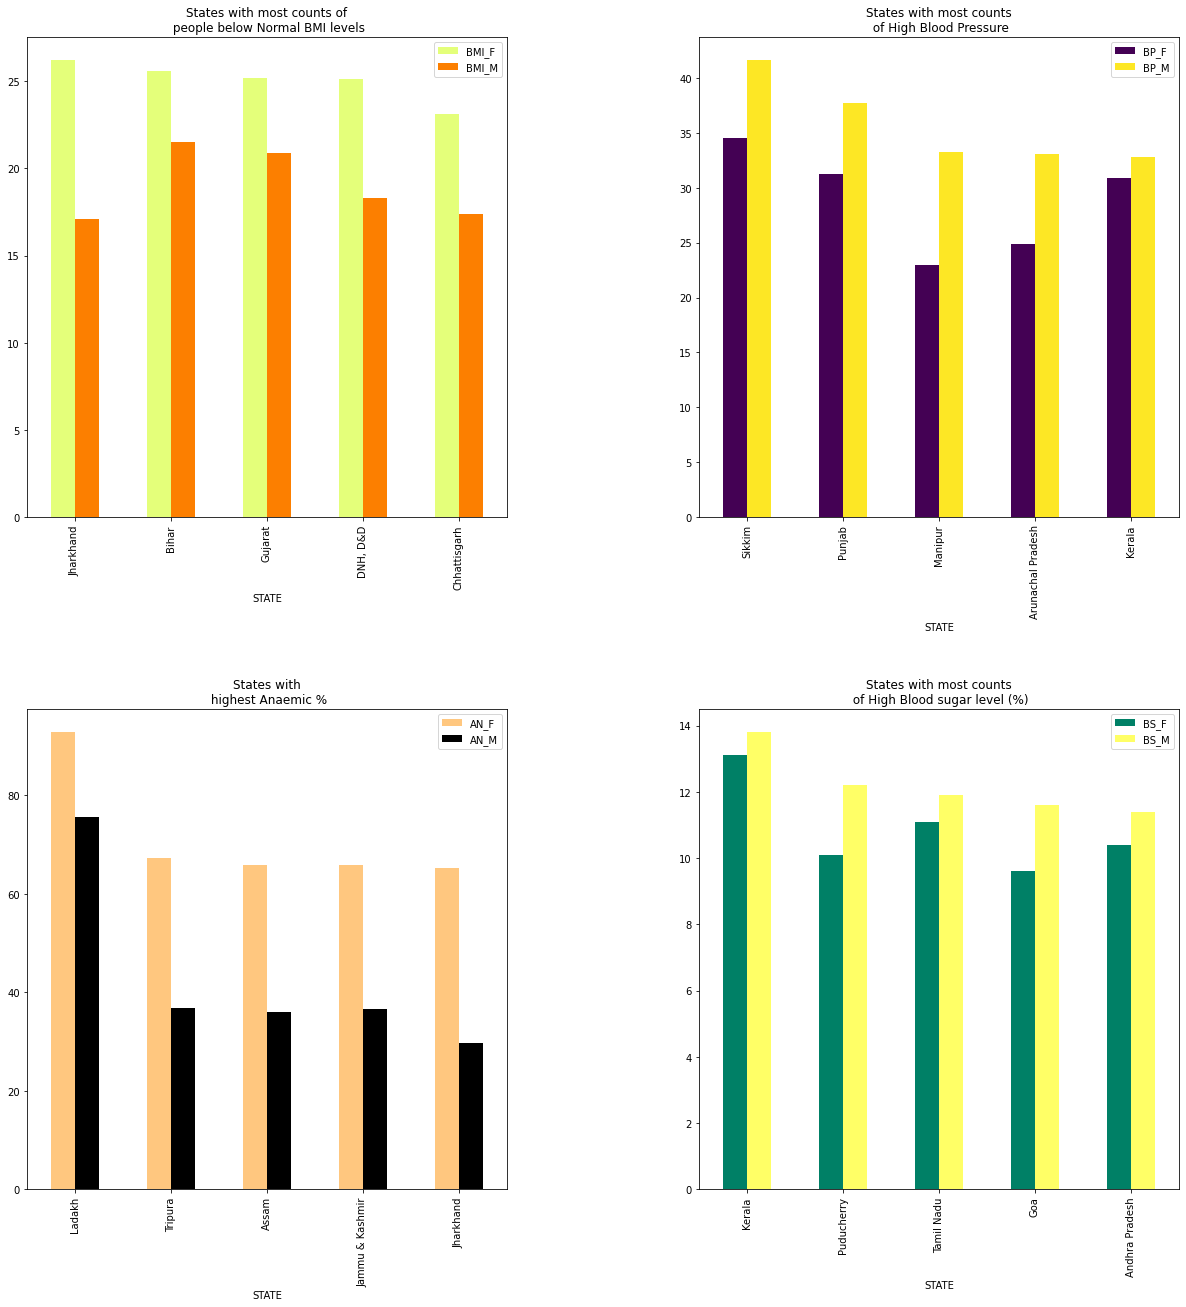

In [24]:
fig, ax =plt.subplots(2,2, figsize=(20,20))
worst_BMI=data.nlargest(5,"BMI_F")[["STATE","BMI_F","BMI_M"]]
worst_BMI.plot(x="STATE",y=["BMI_F","BMI_M"], kind="bar", cmap = 'Wistia', ax=ax[0,0])
ax[0,0].legend(loc='upper right')
worst_BS=data.nlargest(5,"BS_M")[["STATE","BS_F","BS_M"]]
worst_BS.plot(x="STATE",y=["BS_F","BS_M"], kind="bar", cmap = 'summer', ax=ax[1,1])
worst_BP=data.nlargest(5,"BP_M")[["STATE","BP_F","BP_M"]]
worst_BP.plot(x="STATE",y=["BP_F","BP_M"], kind="bar", cmap = 'viridis', ax=ax[0,1])
worst_AN=data.nlargest(5,"AN_F")[["STATE","AN_F","AN_M"]]
worst_AN.plot(x="STATE",y=["AN_F","AN_M"], kind="bar", cmap = 'copper_r', ax=ax[1,0])
ax[0, 0].set_title("States with most counts of\n people below Normal BMI levels")
ax[0, 1].set_title("States with most counts\n of High Blood Pressure")
ax[1, 0].set_title("States with\n highest Anaemic %")
ax[1, 1].set_title("States with most counts\n of High Blood sugar level (%)")



plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### The Literacy Picture : A State-wise and Gender-wise Comparison.

Text(0.5, 1.0, 'Gender-wise Variation In Literacy Rate')

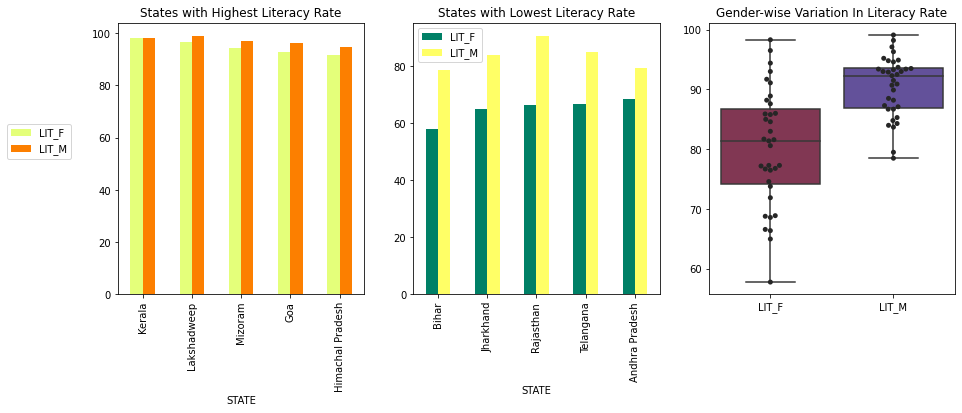

In [12]:
fig, ax =plt.subplots(1,3, figsize=(15,5))
best_LIT=data.nlargest(5,"LIT_F")[["STATE","LIT_F","LIT_M"]]
best_LIT.plot(x="STATE",y=["LIT_F","LIT_M"], kind="bar", cmap = 'Wistia', ax=ax[0])
ax[0].legend(loc=(-0.45,0.5))
worst_LIT=data.nsmallest(5,"LIT_F")[["STATE","LIT_F","LIT_M"]]
worst_LIT.plot(x="STATE",y=["LIT_F","LIT_M"], kind="bar", cmap = 'summer', ax=ax[1])
sns.boxplot(data=data[["LIT_F","LIT_M"]], palette='twilight_r', ax=ax[2])
sns.swarmplot(data=data[["LIT_F","LIT_M"]], color=".15", ax=ax[2])
ax[0].set_title("States with Highest Literacy Rate")
ax[1].set_title("States with Lowest Literacy Rate")
ax[2].set_title("Gender-wise Variation In Literacy Rate")

## The Addiction Condition!

*The Alcohol & Tobacco Consumption Levels are compared across the States and Gender-wise. The 5 States that face the most cases of Alcohol and Tobacco abuse have been represented in the following visualization*

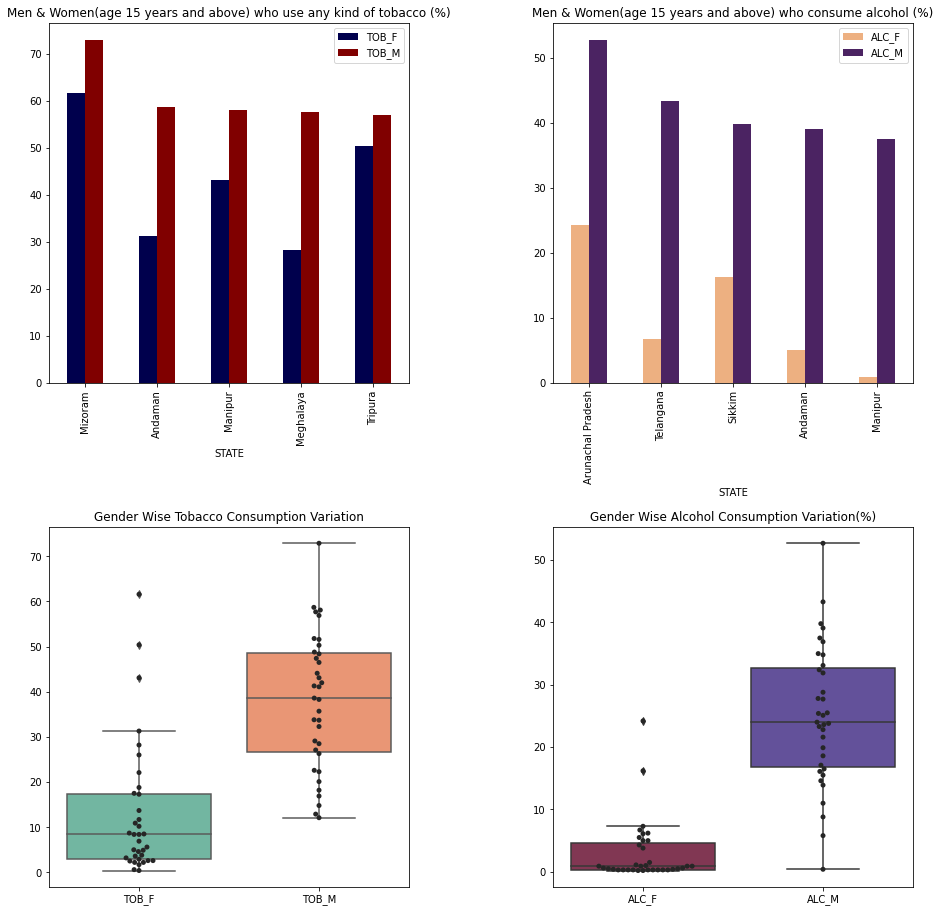

In [13]:
fig, ax =plt.subplots(2,2, figsize=(15, 15))
worst_TOB=data.nlargest(5,"TOB_M")[["STATE","TOB_F","TOB_M"]]
worst_TOB.plot(x="STATE",y=["TOB_F","TOB_M"], kind="bar", cmap = 'seismic', ax=ax[0,0])
ax[0,0].legend(loc='upper right')
worst_ALC=data.nlargest(5,"ALC_M")[["STATE","ALC_F","ALC_M"]]
worst_ALC.plot(x="STATE",y=["ALC_F","ALC_M"], kind="bar", cmap = 'flare', ax=ax[0,1])
sns.boxplot(data=data[["TOB_F","TOB_M"]], palette='Set2', ax=ax[1][0])
sns.swarmplot(data=data[["TOB_F","TOB_M"]], color=".15", ax=ax[1][0])
sns.boxplot(data=data[["ALC_F","ALC_M"]], palette='twilight_r', ax=ax[1][1])
sns.swarmplot(data=data[["ALC_F","ALC_M"]], color=".15", ax=ax[1][1])
ax[0, 0].set_title("Men & Women(age 15 years and above) who use any kind of tobacco (%)")
ax[0, 1].set_title("Men & Women(age 15 years and above) who consume alcohol (%)")
ax[1, 0].set_title("Gender Wise Tobacco Consumption Variation")
ax[1, 1].set_title("Gender Wise Alcohol Consumption Variation(%)")



plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### Summarising the Analysis


- Kerala performs the best in providing the Basic Amenities and Education.
- The population of Ladakh & Jharkhand have the least access to the basic amenities including Electricity, Clean Water and Sanitation.
- Bihar & Jharkhand also display the least Literacy Rate amongst Females.
- Men have a much higher literacy rate then females in the country and the 25 percentile for Women is much lower than that for Men.
- Women are more prone to having below normal BMI. The women in Jharkhand and Bihar are more prone to having below normal BMI.
- Men are more prone to Elevated Blood Pressure levels. The men in Sikkim & Punjab are more prone to suffering from High BP.
- Also, Females are much more exposed to Anaemia then males. Also the Women in Ladakh & Tripura are more prone to Anaemia then in the other parts of the country.
- Males and females are nearly equally exposed to Blood Sugar.

- The addiction trends for Men are much higher than that in Females. 
- Also the tendency for tobacco consumption is more than that for alcohol. Manipur and Andaman made it to the top 5 list for both Tobacco and Alcohol consumption.